# 01.112 Machine Learning - Project
**Gede Ria Ghosalya - 1001841**

---
**Code**

.py codes are available in root folder.

1. run `simple.py` for Part 2

2. run `hmm.py` for Part 3

3. run `maxmarginal.py` for Part 4

4. run `dual_hmm.py` for Part 5 training

5. run `dual_hmm_test.py` for Part 5 on test data

Running any of these files will automatically read, train, and generate prediction for their respective countries.

---


_Part II_
+ Write a function that estimates the emission parameters from the training set using MLE.

In [1]:
#reading file

def read_labeled_file(filename):
    '''
    Read an apropriate file.
    
    Takes the path to file
    returns a list of (word, tag) tuples
    '''
    result = []
    singletweet = []
    with open(filename, "r") as f:
        for line in f:
            if line == "\n":
                result.append(singletweet)
                singletweet = []
            else:
                linelist = line.strip("\n").split(" ")
                singletweet.append(tuple(linelist))
    return result

In [2]:
def estimate_emission_param(data):
    '''
    Takes a list of (word, tag) tuple.
    returns:
        - iterable of all available words
        - iterable of all available tag
        - dictionary of emission parameter 
          with key <word, tag>
    '''
    tag_to_word_count = {}
    word_count = {}
    tag_count = {}
    
    for tweet in data: 
        for tagged_word in tweet:
            # loops through the data and get respective counts
            word = tagged_word[0]
            tag = tagged_word[1]
            
            #incrementing counts
            word_count[word] = word_count.get(word, 0) + 1
            tag_count[tag] = tag_count.get(tag, 0) + 1
            tag_to_word_count[tagged_word] = tag_to_word_count\
                                              .get(tagged_word, 0) + 1
                
    # once count is settled, we can get emission parameter
    emission_parameter = {k: tag_to_word_count[k]/tag_count[k[1]] 
                          for k in tag_to_word_count}
    
    return word_count.keys(), tag_count.keys(), emission_parameter

+  One problem with estimating the emission parameters is that some words that appear in the
test set do not appear in the training set. One simple idea to handle this issue is as follows. First,
replace those words that appear less than k times in the training set with a special token #UNK#
before training. This leads to a “modified training set”. We then use such a modified training set to
train our model.
During the testing phase, if the word does not appear in the “modified training set”, we replace that
word with #UNK# as well.
Set k to 3, implement this fix into your function for computing the emission parameters.

In [3]:
def supress_infrequent_words(data, k=3):
    '''
    Takes a list of (word, tag) tuple
    returns a new list with infrequent
    words replaced with #UNK#
    
    k = number of occurence that is 
        considered to be known
    '''
    word_count = {}

    #get word count
    for tweet in data:
        for tagged_word in tweet:
            word = tagged_word[0]
            word_count[word] = word_count.get(word, 0) + 1
                
    #generate new list
    result = []
    newtweet = []
    for tweet in data:
        for tagged_word in tweet:
            word = tagged_word[0]
            if word_count[word] >= k:
                newtweet.append(tagged_word)
            else:
                tag = tagged_word[1]
                newtweet.append(("#UNK#",tag))
        result.append(newtweet)
        newtweet = []
        
    return result

+ Implement a simple sentiment analysis system that produces the tag for each word x in the sequence.
For all the four datasets EN, FR, CN, and SG, learn these parameters with train, and evaluate your
system on the development set dev.in for each of the dataset. Write your output to dev.p2.out
for the four datasets respectively. Compare your outputs and the gold-standard outputs in dev.out
and report the precision, recall and F scores of such a baseline system for each dataset.

In [4]:
def single_sentiment_analysis(tags, param, word):
    '''
    Takes:
        - a list of of discovered tags
        - a dictionary for emission parameter
        - the word to be tagged
    return:
        - a tuple of (word, predicted_tag)
    '''
    
    mle = (word, "O") #assuming tag O for undiscovered word
    mle_value = 0
    for t in tags:
        if (word, t) in param:
            if param[(word, t)] > mle_value:
                mle = (word, t)
                mle_value = param[(word, t)]
    return mle

The function `single_sentiment_analysis` simply looks for the (word, tag) pair that has the highest probability in the emssion parameter.

In [5]:
def write_simple_prediction(country, part, words, tags, param):
    '''
    takes:
        - countri string ("CN","EN" etc)
        - part string (for question part 1, part 2 etc)
        - a list of discovered words
        - a list of discovered tags
        - a dictionary of emission parameter
    '''
    input_filename = country + "/dev.in"
    output_filename = country + "/dev.p"+part+".out"
    with open(input_filename, "r") as inputfile:
        with open(output_filename, "w") as outputfile:
            for line in inputfile:
                if line =="\n":
                    outputfile.write("\n")
                    continue
                if line.strip("\n") in words:
                    pred = single_sentiment_analysis(tags, param, line.strip("\n"))
                    outputfile.write(" ".join(pred)+"\n")
                else:
                    outputfile.write("#UNK# O\n")

In [6]:
from datetime import datetime

# now we do it for all 4 countries
# recording timing
for c in ["CN", "EN", "SG", "FR"]:
    start = datetime.now()
    data = read_labeled_file(c+"/train")
    sdata = supress_infrequent_words(data)
    words, tags, em_param = estimate_emission_param(data)
    write_simple_prediction(c,"2",
                    words, tags, em_param)
    end = datetime.now()
    delt = end - start
    print("{} part 2 done in {}.{}s"\
          .format(c, delt.seconds, delt.microseconds))

CN part 2 done in 0.180880s
EN part 2 done in 0.77026s
SG part 2 done in 0.366424s
FR part 2 done in 0.93853s


| Country |           | Count             | Correct          | Precision | Recall | F-Score |
|---------|-----------|-------------------|------------------|-----------|--------|---------|
| CN      | Entity    | 1848 (362 Gold)   | 117              | 0.0633    | 0.3232 | 0.1059  |
|         | Sentiment |                   | 72               | 0.0390    | 0.1989 | 0.0652  |
| EN      | Entity    | 757 (226 Gold)    | 139              | 0.1836    | 0.6150 | 0.2828  |
|         | Sentiment |                   | 47               | 0.0621    | 0.2080 | 0.0956  |
| SG      | Entity    |  2970 (1382 Gold) | 527              | 0.1774    | 0.3813 | 0.2422  |
|         | Sentiment |                   | 274              | 0.0923    | 0.1983 | 0.1259  |
| FR      | Entity    | 754 (223 Gold)    | 184              | 0.2440    | 0.8251 | 0.3767  |
|         | Sentiment |                   | 72               | 0.0955    | 0.3229 | 0.1474  |

_Part III_

+ Write a function that estimates the transition parameters from the training set using MLE

In [7]:
def estimate_transition_parameter(data):
    '''
    takes a list of (word, tag) tuple
    returns a dictionary of estimated transition parameter
    with format <(tag0, tag1):count>
    '''
    
    tag_to_tag_count = {}
    tag_count = {"START": 0, "STOP": 0}
    for tweet in data:
        # due to data structure, we have to add
        # a dummy word with the STOP tag
        aptweet = tweet + [("endword", "STOP")]
        
        for i in range(len(aptweet)):
            # looping each tag, checking previous tag
            tag = aptweet[i][1]
            # keep track of tag count
            tag_count[tag] = tag_count.get(tag, 0) + 1
                
            if i == 0:
                # no previous tag, transitioned from START
                tag_count["START"] += 1
                tag_transition = ("START", tag)
            else:
                prevtag = aptweet[i-1][1]
                tag_transition = (prevtag, tag)
                
            # track the tag_transition count
            prev_count = tag_to_tag_count.get(tag_transition, 0)
            tag_to_tag_count[tag_transition] = prev_count + 1
            
    # once the count is settled, we can generate the probability
    estimated_param = {k: tag_to_tag_count[k]/tag_count[k[0]]
                       for k in tag_to_tag_count}
    return estimated_param


+ Use the estimated transition and emission parameters, implement the Viterbi algorithm. For all datasets, learn the model parameters with train. Run the Viterbi algorithm on the development
set dev.in using the learned models, write your output to dev.p3.out for the four datasets
respectively. Report the precision, recall and F scores of all systems.

In [8]:
def predict_tag_sequence(word_sequence, words,
                         tags,trans_param,em_param):
    '''
    takes:
        - the list of words (in sequence) to predict
        - a list of known words
        - a list of known tags
        - a dictionary of transition parameter
        - a dictionary of emission parameter
    returns:
        - a list of tags in sequence
    '''
    
    # viterbi's dynamic programming
    pi_dp = {(0, "START"):1}
    tags = list(tags)
    # add START to known tags just in case
    tags.append("START")
    
    # viterbi function to recurse forward
    def viterbi_pi(stage, tag):
        '''
        takes:
            - int stage (position in sequence)
            - string tag
        returns highest value when preceeded with 
                suitable tag
        '''
        if stage == 0:
            # base case, at stage 0 tag should be START
            result = 1.0 if tag == "START" else 0.0
            return result
        elif stage >= len(word_sequence)+1:
            # at stage N there is no emission
            max_weight = 0
            for prev_tag in tags:
                prev_cost = viterbi_pi(stage-1, prev_tag) # recursion
                trans_prob = trans_param.get((prev_tag, tag), 0)
                current_weight = prev_cost*trans_prob
                # compare with highest discovered weight
                if max_weight < current_weight:
                    max_weight = current_weight
            # for dynamic programming
            pi_dp[(stage, tag)] = max_weight
            return max_weight
        else:
            # any other case, considers emission & transition
            if (stage, tag) in pi_dp:
                # if the value is saved by dynamic programming
                return pi_dp[(stage, tag)]
            else:
                max_weight = 0
                for prev_tag in tags:
                    prev_cost = viterbi_pi(stage-1, prev_tag) #recursion
                    trans_prob = trans_param.get((prev_tag, tag), 0)
                    
                    word = word_sequence[stage-1]
                    # handling undiscovered word
                    if word not in words:
                        word = "#UNK#"
                    em_prob = em_param.get((word, tag), 0)
                    # compare with highest discovered weight
                    curr_weight = prev_cost*trans_prob*em_prob
                    if max_weight < curr_weight:
                        max_weight = curr_weight
                # for dynamic programming   
                pi_dp[(stage, tag)] = max_weight
                return max_weight

    # run recursive function on all tags
    for i in range(len(word_sequence)+1):
        for t in tags:
            viterbi_pi(i, t)
    
    tag_seqr = ["STOP"] # reversd tag sequence
    
    # backward checking for tag sequence
    lenw = len(word_sequence)
    for i in range(lenw+1):
        if i == lenw:
            # reaches start of word sequence
            tag_seqr.append("START")
            continue
            
        # --- this part is to support Part 5 ---#
        #         where it has 'none' tag
        if "none" in tags:
            max_tag = "none"
        else:
            max_tag = "O"
        
        # stars working backward to get tag sequence
        max_weight = 0
        for tag in tags:
            prev_prob = viterbi_pi(lenw-i, tag)
            next_tag = tag_seqr[-1]
            trans_prob = trans_param.get((tag, next_tag), 0)
            curr_weight = prev_prob*trans_prob
            if max_weight < curr_weight:
                max_weight = curr_weight
                max_tag = tag # get argmax
        tag_seqr.append(max_tag)
        
    # reverse the tag_seqr to get tag_sequence
    return tag_seqr[::-1]

In [9]:
def write_hmm_prediction(country, part, prediction_function,
                         words, tags, em_param, trans_param):
    '''
    Function to write HMM prediction
    '''
    input_filename = country + "/dev.in"
    output_filename = country + "/dev.p"+part+".out"
    indata = []
    with open(input_filename, "r") as infile:
        indata = infile.read().strip('\n').split('\n\n') #read and separate tweets
    
    with open(output_filename, "w") as outfile:
        for tweet in indata:
            word_sequence = tweet.split('\n')
            predicted_tag_sequence = prediction_function(word_sequence, words,
                                                tags, trans_param, em_param)
            predicted_tag_sequence.remove("START")
            predicted_tag_sequence.remove("STOP")
            if len(word_sequence) != len(predicted_tag_sequence):
                print("WARNING!! Different length {} / {}"\
                      .format(word_sequence, predicted_tag_sequence))
            for i in range(len(word_sequence)):
                line = "{} {}\n".format(word_sequence[i], 
                                        predicted_tag_sequence[i])
                outfile.write(line)
            outfile.write("\n")


for c in ["CN", "EN", "SG", "FR"]:
    start = datetime.now()
    data = read_labeled_file(c+"/train")
    sdata = supress_infrequent_words(data)
    words, tags, em_param = estimate_emission_param(sdata)
    trans_param = estimate_transition_parameter(sdata)
    write_hmm_prediction(c,"3", predict_tag_sequence,
                        words, tags, em_param, trans_param)
    end = datetime.now()
    delt = end - start
    print("{} part 3 done in {}.{}s"\
          .format(c, delt.seconds, delt.microseconds))

CN part 3 done in 0.782421s
EN part 3 done in 0.453658s
SG part 3 done in 2.996454s
FR part 3 done in 0.495264s


Result is as follows:

| Country |           | Count           | Correct Instance | Precision | Recall | F-Score |
|---------|-----------|-----------------|------------------|-----------|--------|---------|
| CN      | Entity    | 158 (362 Gold)  | 64               | 0.4051    | 0.1768 | 0.2462  |
|         | Sentiment |                 | 47               | 0.2975    | 0.1298 | 0.1808  |
| EN      | Entity    | 162 (226 Gold)  | 104              | 0.6420    | 0.4602 | 0.5361  |
|         | Sentiment |                 | 64               | 0.3951    | 0.2832 | 0.3299  |
| SG      | Entity    | 723 (1382 Gold) | 386              | 0.5339    | 0.2793 | 0.3667  |
|         | Sentiment |                 | 244              | 0.3375    | 0.1766 | 0.2318  |
| FR      | Entity    | 166 (223 Gold)  | 112              | 0.6747    | 0.5022 | 0.5758  |
|         | Sentiment |                 | 72               | 0.4337    | 0.3229 | 0.3702  |

 Part IV

+ Use the estimated transition and emission parameters, implement the alternative max-marginal decoding algorithm. Clearly describe the steps of your algorithm in your report.

In [10]:
def predict_tag_sequence_maxmarginal(word_sequence, words, tags,
                                     trans_param, em_param):
    '''
    using max-marginal decoding algorithm
    '''
    
    # ----- Alpha Function -----
    alphas = {}
    def alpha_forward(tag, stage):
        '''
        Forward algorithm
        '''
        if stage <= 1:
            # base case
            score = trans_param.get(("START", tag), 0)
            alphas[(tag, stage)] = score
            return score
        else:
            if (tag, stage) in alphas:
                # return stored value, if any
                return alphas[(tag, stage)]
            score = 0
            for prev_tag in tags:
                prev_score = alpha_forward(prev_tag, stage-1) # recursion
                trans_prob = trans_param.get((prev_tag, tag), 0)
                # handle undiscovered word
                word = word_sequence[stage-2]
                if word not in words:
                    word = "#UNK#"
                em_prob = em_param.get((word, prev_tag), 0)
                curr_score = prev_score*trans_prob*em_prob
                # sum the looped score
                score += curr_score
            alphas[(tag, stage)] = score
            return score
        
    # ----- Beta Function -----
    betas = {}
    def beta_back(tag, stage):
        '''
        Backward algorithm
        '''
        if stage >= len(word_sequence):
            # if last word in sequence
            trans_prob = trans_param.get((tag, "STOP"), 0)
            word = word_sequence[stage-1]
            em_prob = em_param.get((word, tag), 0)
            score = trans_prob*em_prob
            betas[(tag, stage)] = score
            return score
        else:
            if (tag, stage) in betas:
                return betas[(tag, stage)]
            score = 0
            for t in tags:
                prev_score = beta_back(t, stage+1) # recursion
                trans_prob = trans_param.get((tag, t), 0)
                word = word_sequence[stage-1]
                if word not in words:
                    word = "#UNK#"
                em_prob = em_param.get((word, tag), 0)
                curr_score = prev_score*trans_prob*em_prob
                score += curr_score
            betas[(tag, stage)] = score
            return score
    
    tag_seq = ["START"]
    
    #
    lenw = len(word_sequence)
    for i in range(1,lenw+1):
        # --- this part is to support Part 5 ---#
        #         where it has 'none' tag
        if "none" in tags:
            max_tag = "none"
        else:
            max_tag = "O"
        max_weight = 0
        for tag in tags:
            alph = alpha_forward(tag, i)
            beth = beta_back(tag, i)
            curr_weight = alph*beth
            if curr_weight > max_weight:
                max_weight = curr_weight
                max_tag = tag
        tag_seq.append(max_tag)
        
    tag_seq.append("STOP")
    return tag_seq


In [11]:

for c in ["EN", "FR"]:
    start = datetime.now()
    data = read_labeled_file(c+"/train")
    sdata = supress_infrequent_words(data)
    words, tags, em_param = estimate_emission_param(sdata)
    trans_param = estimate_transition_parameter(sdata)
    write_hmm_prediction(c,"4",
                        predict_tag_sequence_maxmarginal,
                        words, tags, em_param, trans_param)
    end = datetime.now()
    delt = end - start
    print("{} part 4 done in {}.{}s"\
          .format(c, delt.seconds, delt.microseconds))

EN part 4 done in 0.515991s
FR part 4 done in 0.474790s


Result is as follows:

| Country |           | Count           | Correct Instance | Precision | Recall | F-Score |
|---------|-----------|-----------------|------------------|-----------|--------|---------|
| EN      | Entity    | 159 (226 Gold)  | 100              | 0.6289    | 0.4425 | 0.5195  |
|         | Sentiment |                 | 59               | 0.3711    | 0.2611 | 0.3065  |
| FR      | Entity    | 168 (223 Gold)  | 112              | 0.6667    | 0.5022 | 0.5729  |
|         | Sentiment |                 | 73               | 0.4345    | 0.3274 | 0.3734  |

As can be seen, the result from max-marginal is a little less accurate than Viterbi.

Part V

Now, based on the training and development set, think of a better design for developing an
improved sentiment analysis system for tweets using any model you like. Please explain clearly the
method that you used for designing the new system.

In [12]:
'''
Using dual-tagged HMM

There is some rule to the tagging that is not fully
covered by the HMM alone, specifically sentiment
vs identity. For example, B-positive cannot be
followed by I-negative. 

Hence, one tag class is sentiment, [positive, negative, neutral, none]
and another  is identity [O, B, I]
before the observation layer
'''

# first of all, we want to generate
# properly-layered file

def split_tag_layer(input_filename, output_filename):
    with open(input_filename, "r") as infile:
        with open(output_filename, "w") as outfile:
            for inline in infile:
                if inline == "\n":
                    outfile.write(inline)
                    continue
                    
                line = inline.strip("\n").split(" ")
                if len(line) < 2:
                    pass
                elif "positive" in line[1]:
                    line[1] = line[1][0]
                    line.append("positive")
                elif "negative" in line[1]:
                    line[1] = line[1][0]
                    line.append("negative")
                elif "neutral" in line[1]:
                    line[1] = line[1][0]
                    line.append("neutral")
                else:
                    line.append("none")
                
                string = " ".join(line) + "\n"
                outfile.write(string)

In [13]:
'''
Now that the file is tagged properly,
we can generate estimated parameters

Note that while the identity tags [O, B, I] are ordered,
sentiments are not - they are not always associated with 
the identified phares
'''

def read_splitlabel_file(filename):
    sm_emparam = []
    sm_tweet = []
    id_emparam = []
    id_tweet = []
    with open(filename, "r") as f:
        for line in f:
            if line == "\n":
                id_emparam.append(id_tweet)
                id_tweet = []
                sm_emparam.append(sm_tweet)
                sm_tweet = []
            else:
                linetags = line.strip("\n").split(" ")
                id_tweet.append(tuple([linetags[0], linetags[1]]))
                sm_tweet.append(tuple([linetags[0], linetags[2]]))
    return sm_emparam, id_emparam


In [14]:
'''
Once data is extracted, we can estimate
identity (and sentiment) tags with normal HMM methods
'''

def predict_dualtag_sequence(word_sequence, words, tags, stags,
                            id_emparam, id_transparam,
                            sm_emparam, sm_data):
    id_tagsequence = predict_tag_sequence(word_sequence, words, tags,
                                          id_transparam, id_emparam)
    sm_tagsequence = predict_tag_sequence_maxmarginal(word_sequence, words, stags,
                                                      sm_transparam, sm_emparam)
    # we do some cleanup
    # because in the original, only identities have sentiments
    # but the prediction might not be the case
    sm_count = {}
    for sm in sm_tagsequence:
        sm_count[sm] = sm_count.get(sm, 0) + 1
        
    if "none" in sm_count:
        del sm_count["none"]
    if "START" in sm_count:
        del sm_count["START"]
    if "STOP" in sm_count:
        del sm_count["STOP"]
        
    mostcommon = ("neutral", 0)
    for sm in sm_count:
        if sm_count[sm] > mostcommon[1]:
            mostcommon = (sm, sm_count[sm])

    for i in range(1,len(id_tagsequence)):
        if id_tagsequence[i] == "B" and sm_tagsequence[i] == "none":
            if id_tagsequence[i+1] == "I" and sm_tagsequence[i+1] != "none":
                sm_tagsequence[i] = sm_tagsequence[i+1]
            else:
                sm_tagsequence[i] = mostcommon[0]
        elif id_tagsequence[i] == "I" and sm_tagsequence[i] == "none":
            sm_tagsequence[i] = sm_tagsequence[i-1]
            
    return id_tagsequence, sm_tagsequence


In [15]:
'''
Now, we can write the predictions
'''
def write_dualhmm_prediction(country, part, prediction_function,
                             words, tags, stags,
                             id_emparam, id_transparam,
                             sm_emparam, sm_transparam):
    input_filename = country + "/dev.in"
    output_filename = country + "/dev.p"+part+".out"
    indata = []
    with open(input_filename, "r") as infile:
        indata = infile.read().strip('\n').split('\n\n') #read and separate tweets
    
    with open(output_filename, "w") as outfile:
        for tweet in indata:
            word_sequence = tweet.split('\n')
            pred_id_tag, pred_sm_tag = prediction_function(word_sequence, words,
                                                            tags, stags,
                                                            id_emparam, id_transparam,
                                                            sm_emparam, sm_transparam)
            pred_id_tag.remove("START")
            pred_id_tag.remove("STOP")
            pred_sm_tag.remove("START")
            pred_sm_tag.remove("STOP")
            if len(word_sequence) != len(pred_id_tag):
                print("WARNING!! Different length \n{} / \n{}"\
                      .format(word_sequence, pred_id_tag))
            for i in range(len(word_sequence)):
                line = "{} {} {}\n".format(word_sequence[i], pred_id_tag[i], pred_sm_tag[i])
                outfile.write(line)
            outfile.write("\n")

            
for c in ["CN", "EN", "SG", "FR"]:
    start = datetime.now()
    split_tag_layer(c+"/train", c+"/trainl")
    sm_data, id_data = read_splitlabel_file(c+"/trainl")
    sm_data = supress_infrequent_words(sm_data)
    id_data = supress_infrequent_words(id_data)
    
    words, tags, id_emparam = estimate_emission_param(id_data)
    id_transparam = estimate_transition_parameter(id_data)
    swords, stags, sm_emparam = estimate_emission_param(sm_data)
    sm_transparam = estimate_transition_parameter(sm_data)
    
    write_dualhmm_prediction(c,"5l", predict_dualtag_sequence,
                             words, tags, stags,
                             id_emparam, id_transparam,
                             sm_emparam, sm_transparam)
    end = datetime.now()
    delt = end - start
    print("{} part 5 done in {}.{}s"\
          .format(c, delt.seconds, delt.microseconds))

CN part 5 done in 1.22014s
EN part 5 done in 0.497414s
SG part 5 done in 3.956983s
FR part 5 done in 0.522856s


In [16]:
'''
Finally, we convert back the file
to the original format
'''
def merge_tag_layer(input_filename, output_filename):
    with open(input_filename, "r") as infile:
        with open(output_filename, "w") as outfile:
            for inline in infile:
                if inline == "\n":
                    outfile.write("\n")
                    continue
                line = inline.strip("\n").split(" ")
                if line[1] == "O":
                    string = " ".join(line[:-1]) + "\n"
                else:
                    string = " ".join(line[:-1]) + "-"+ line[2] + "\n"
                outfile.write(string)
                
for c in ["CN","EN","SG","FR"]:
    merge_tag_layer(c+"/dev.p5l.out", c+"/dev.p5.out")

In [17]:
'''
Comparing this to part3 (HMM with Viterbi)
 // code taken from EvalScript
'''

from EvalScript.evalResult import get_predicted, get_observed

#Compare results bewteen gold data and prediction data
def compare_observed_to_predicted(observed, predicted):

    correct_sentiment = 0
    correct_entity = 0

    total_observed = 0.0
    total_predicted = 0.0

    #For each Instance Index example (example = 0,1,2,3.....)
    for example in observed:
        observed_instance = observed[example]
        predicted_instance = predicted[example]

        #Count number of entities in gold data
        total_observed += len(observed_instance)
        #Count number of entities in prediction data
        total_predicted += len(predicted_instance)

        #For each entity in prediction
        for span in predicted_instance:
            span_begin = span[1]
            span_length = len(span) - 1
            span_ne = (span_begin, span_length)
            span_sent = span[0]

            #For each entity in gold data
            for observed_span in observed_instance:
                begin = observed_span[1]
                length = len(observed_span) - 1
                ne = (begin, length)
                sent = observed_span[0]

                #Entity matched
                if span_ne == ne:
                    correct_entity += 1
                    

                    #Entity & Sentiment both are matched
                    if span_sent == sent:
                        correct_sentiment += 1

    result = []
    result.append(total_observed)
    result.append(total_predicted)
    result.append(correct_entity)
    prec = 100*correct_entity/total_predicted
    rec = 100*correct_entity/total_observed
    result.append(prec) # entity precision
    result.append(rec) # entity recall
    result.append(2/((1/prec)+(1/rec)))
    result.append(correct_sentiment)
    prec = 100*correct_sentiment/total_predicted
    rec = 100*correct_sentiment/total_observed
    result.append(prec) # sentiment precision
    result.append(rec) # sentiment recall
    result.append(2/((1/prec)+(1/rec)))
    
    return result


<IPython.core.display.Javascript object>


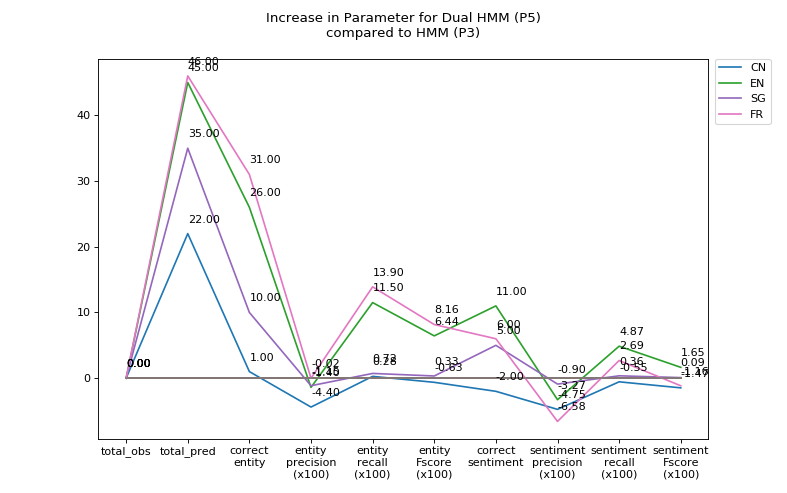

In [18]:
import matplotlib.pyplot as plt
%matplotlib notebook

pred_eval = {}

fig = plt.figure()
ax = fig.add_subplot(111)

for c in ["CN","EN","SG","FR"]:
    gold = open(c+"/dev.out", "r", encoding='UTF-8')
    observed = get_observed(gold)
    prediction3 = open(c+"/dev.p3.out", "r", encoding='UTF-8')
    predicted3 = get_predicted(prediction3)
    resul3 = compare_observed_to_predicted(observed, predicted3)
    
    gold = open(c+"/dev.out", "r", encoding='UTF-8')
    observed = get_observed(gold)
    prediction5 = open(c+"/dev.p5.out", "r", encoding='UTF-8')
    predicted5 = get_predicted(prediction5)
    resul5 = compare_observed_to_predicted(observed, predicted5)
    
    resul_diff = [resul5[i] - resul3[i] for i in range(len(resul3))]
    
    plotlabels = ["total_obs", "total_pred", "correct\nentity", "entity\nprecision\n(x100)",
                  "entity\nrecall\n(x100)", "entity\nFscore\n(x100)", "correct\nsentiment", 
                  "sentiment\nprecision\n(x100)", "sentiment\nrecall\n(x100)","sentiment\nFscore\n(x100)"]
    
    x3 = [x for x in range(len(plotlabels))]
    plt.title("Increase in Parameter for Dual HMM (P5)\ncompared to HMM (P3)\n")
    plt.plot(x3, resul_diff, label=c)
    for i,j in zip(x3,resul_diff):
        ax.annotate('%.2f' %j, xy=(i,j), 
                    xytext=(0,10), 
                    textcoords='offset points')

    plt.plot([0 for c in x3])
    plt.xticks(x3, plotlabels)
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.show()

As seen from the graph above, the new model predicted more entity than its normal HMM counterpart. In general, it also has more `correct_entity` and `correct_sentiment`. Note that `precisions` seems to be going down, and this is because separating the entity tags from sentiment tags results in prediction of more entities. Also notice that `recall` seems to either be increasing or staying the same.

Finally, we do this for the test data.

In [20]:
def write_dualhmm_ontest(country, prediction_function,
                             words, tags, stags,
                             id_emparam, id_transparam,
                             sm_emparam, sm_transparam):
    input_filename = country + "/test.in"
    output_filename = country + "/test.split.out"
    indata = []
    with open(input_filename, "r") as infile:
        indata = infile.read().strip('\n').split('\n\n') #read and separate tweets
    
    with open(output_filename, "w") as outfile:
        for tweet in indata:
            word_sequence = tweet.split('\n')
            pred_id_tag, pred_sm_tag = prediction_function(word_sequence, words,
                                                            tags, stags,
                                                            id_emparam, id_transparam,
                                                            sm_emparam, sm_transparam)
            pred_id_tag.remove("START")
            pred_id_tag.remove("STOP")
            pred_sm_tag.remove("START")
            pred_sm_tag.remove("STOP")
            if len(word_sequence) != len(pred_id_tag):
                print("WARNING!! Different length \n{} / \n{}"\
                      .format(word_sequence, pred_id_tag))
            for i in range(len(word_sequence)):
                line = "{} {} {}\n".format(word_sequence[i], pred_id_tag[i], pred_sm_tag[i])
                outfile.write(line)
            outfile.write("\n")
    
    merge_tag_layer(c+"/test.split.out", c+"/test.p5.out")

for c in ["EN", "FR"]:
    start = datetime.now()
    split_tag_layer(c+"/train", c+"/trainl")
    sm_data, id_data = read_splitlabel_file(c+"/trainl")
    sm_data = supress_infrequent_words(sm_data)
    id_data = supress_infrequent_words(id_data)
    
    words, tags, id_emparam = estimate_emission_param(id_data)
    id_transparam = estimate_transition_parameter(id_data)
    swords, stags, sm_emparam = estimate_emission_param(sm_data)
    sm_transparam = estimate_transition_parameter(sm_data)
    
    write_dualhmm_ontest(c, predict_dualtag_sequence,
                         words, tags, stags,
                         id_emparam, id_transparam,
                         sm_emparam, sm_transparam)
    end = datetime.now()
    delt = end - start
    print("{} test done in {}.{}s"\
          .format(c, delt.seconds, delt.microseconds))

EN test done in 0.529411s
FR test done in 0.485048s
